In [2]:
# !pip install kaggle

In [3]:
## configure kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets list -s 'Happy-Sad Peoples'

In [5]:
# !kaggle datasets download -d hasnainkhan0123/binary-image-classification

In [6]:
# import zipfile

# zip_ref = zipfile.ZipFile('/workspaces/imageclassifier/binary-image-classification.zip')
# zip_ref.extractall('/workspaces/imageclassifier/')
# zip_ref.close()

In [7]:
import tensorflow as tf
import cv2
import imghdr
import os
import numpy as np
import matplotlib.pyplot as plt


2024-11-18 14:29:45.659303: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 14:29:45.662338: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 14:29:45.670660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731940185.691941   28972 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731940185.696926   28972 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 14:29:45.715344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

2024-11-18 14:29:50.062876: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


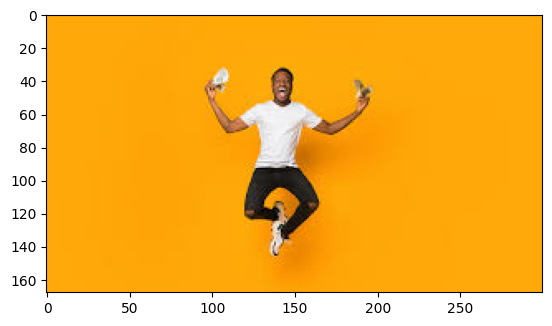

In [8]:
## load the images
img = tf.io.read_file('/workspaces/imageclassifier/testing-images/(1).jpeg')
img = tf.image.decode_image(img, channels=3)

## convert the image to a numpy array
img = tf.cast(img, tf.uint8)
img = img.numpy()

## display the image
plt.imshow(img)
plt.show()

In [9]:
data_dir = 'Data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# load data

In [11]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 173 files belonging to 2 classes.


In [12]:
data_itter = data.as_numpy_iterator()

In [13]:
batch = data_itter.next()

In [14]:
# it has 32 image in one batch 256x256 is the 
# shape of the image and 3 is the channel of the image of the colorful image
batch[0].shape

(32, 256, 256, 3)

In [15]:
# selected 4 images from this batches
batch[0][:4].shape

(4, 256, 256, 3)

## Scale the data

In [16]:
data = data.map(lambda X, y: (X/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.09803928e-02],
          ...,
          [1.17647061e-02, 6.27451017e-02, 1.25490203e-01],
          [1.27450982e-02, 6.37254938e-02, 1.26470596e-01],
          [1.17647061e-02, 6.27451017e-02, 1.25490203e-01]],
 
         [[0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.09803928e-02],
          ...,
          [1.17647061e-02, 6.27451017e-02, 1.25490203e-01],
          [1.27450982e-02, 6.37254938e-02, 1.26470596e-01],
          [1.17647061e-02, 6.27451017e-02, 1.25490203e-01]],
 
         [[0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.88235296e-02],
          [0.00000000e+00, 2.74509806e-02, 5.09803928e-02],
          ...,
          [1.17647061e-02, 6.27451017e-02, 1.2549

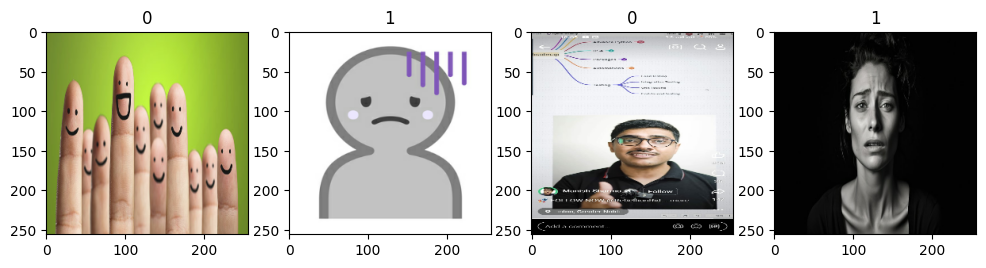

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(12, 21))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

plt.show()    

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [20]:
train_size, test_size, val_size

(4, 1, 1)

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten, Conv2D

In [37]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(Dropout(0.2))
# model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 254, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,765,537 (60.14 MB)

 Trainable params: 15,765,537 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(train, epochs=25, validation_data=val)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5188 - loss: 6.6962 - val_accuracy: 0.5312 - val_loss: 1.0781
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5969 - loss: 1.0050 - val_accuracy: 0.4688 - val_loss: 0.6935
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5927 - loss: 0.6241 - val_accuracy: 0.7500 - val_loss: 0.4979
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8146 - loss: 0.4233 - val_accuracy: 0.8750 - val_loss: 0.4778
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8552 - loss: 0.3868 - val_accuracy: 0.9375 - val_loss: 0.3138
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9281 - loss: 0.2969 - val_accuracy: 0.9688 - val_loss: 0.2326
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.9365 - loss: 0.2060 - val_accuracy: 1.0000 - val_loss: 0.1398
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9625 - loss: 0.1414 - val_accuracy: 0.9375 - val_loss: 0.1909
Epoch 9/

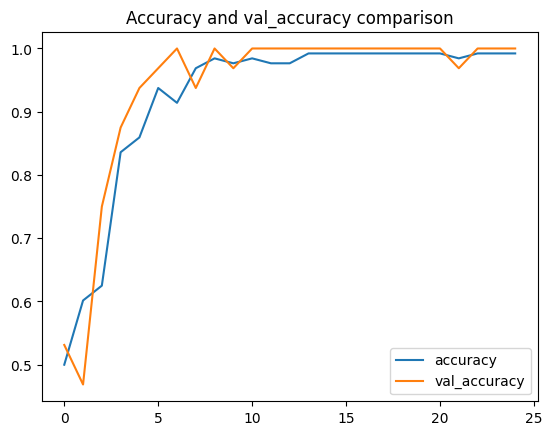

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and val_accuracy comparison")
plt.legend()
plt.show()

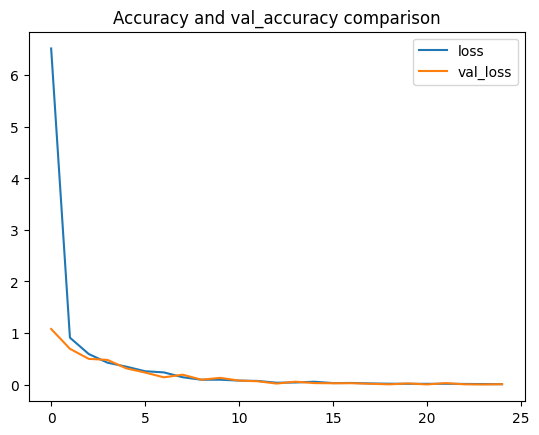

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Accuracy and val_accuracy comparison")
plt.legend()
plt.show()

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(yhat, y)
    rec.update_state(yhat, y)
    acc.update_state(yhat, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


2024-11-18 14:42:07.163723: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [47]:
print(pre.result(), rec.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.30769232, shape=(), dtype=float32) tf.Tensor(0.6923077, shape=(), dtype=float32)


## test the model

shape of the image is: (168, 300, 3)


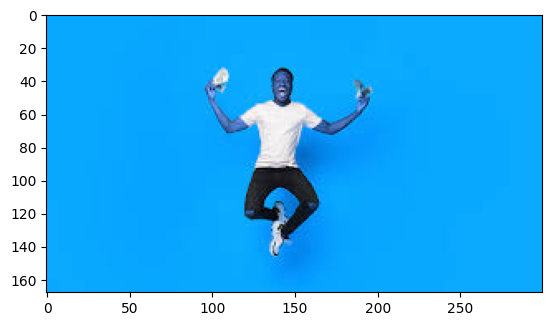

In [149]:
img = cv2.imread('testing-images/(1).jpeg')
plt.imshow(img)
print("shape of the image is:", img.shape)


TensorShape([256, 256, 3])

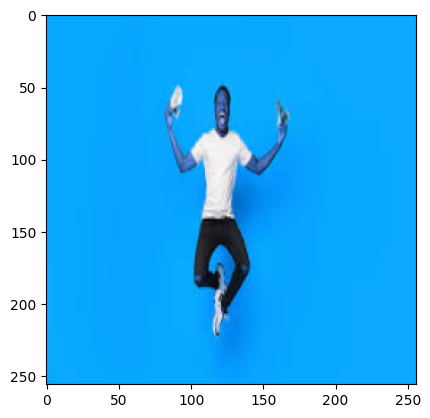

In [150]:
# resize the size of the image
img = tf.image.resize(img, (256, 256))
plt.imshow(img.numpy().astype(int))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.05263583]]
It's happy moment !


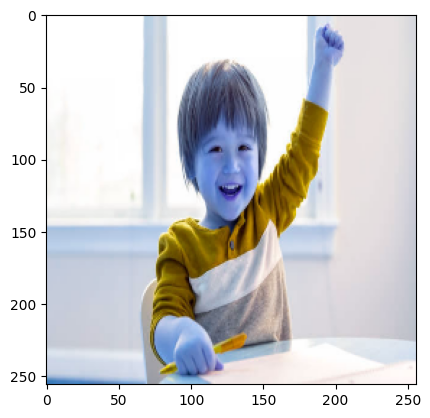

In [168]:
# laod the image
img = cv2.imread('test-image/images (13).jpeg')
# resize the image
img = tf.image.resize(img, (256, 256))
# display the image
plt.imshow(img.numpy().astype(int))
# predict the image
predicted = model.predict(np.expand_dims(img/255, 0))
print(predicted)

if predicted[0] > 0.5:
    print("it's sad time for this guy !")
else:
    print("It's happy moment !")

In [154]:
if predicted[0] > 0.5:
    print("it's sad time for this guy !")
else:
    print("It's happy moment !")

it's sad time for this guy !
